In [ ]:
import os
import zipfile
from pathlib import Path
import shutil

# ======================================================
# ⚙️ CONFIGURACIÓN INICIAL
# ======================================================

project_path = r"D:\Portafolio\Proyecto_e-commerce"
os.makedirs(project_path, exist_ok=True)
os.chdir(project_path)

print(f"Ruta de trabajo establecida en: {project_path}")

# ======================================================
# 📦 CONFIGURACIÓN DE KAGGLE
# ======================================================

# Instalar kaggle
try:
    import kaggle
except ImportError:
    import subprocess
    subprocess.check_call(["pip", "install", "kaggle"])
    import kaggle

# Configurar directorio de kaggle
kaggle_dir = Path.home() / ".kaggle"
kaggle_dir.mkdir(exist_ok=True)

# Verificar que kaggle.json existe
kaggle_json = Path("kaggle.json")
if not kaggle_json.exists():
    raise FileNotFoundError("⚠️ No se encontró el archivo 'kaggle.json' en este directorio.")

# Copiar kaggle.json
shutil.copy("kaggle.json", kaggle_dir / "kaggle.json")
os.chmod(kaggle_dir / "kaggle.json", 0o600)
print("✅ Archivo kaggle.json configurado correctamente.")

# ======================================================
# ⬇️ DESCARGAR DATASET USANDO LA API DE PYTHON
# ======================================================

data_dir = Path(project_path) / "data"
olist_dir = data_dir / "olist_dataset"
data_dir.mkdir(exist_ok=True)

print("📦 Descargando dataset desde Kaggle...")

# Usar la API de kaggle directamente
from kaggle.api.kaggle_api_extended import KaggleApi

try:
    api = KaggleApi()
    api.authenticate()
    
    # Descargar el dataset
    api.dataset_download_files(
        "olistbr/brazilian-ecommerce", 
        path=str(data_dir),
        unzip=False  # No descomprimir automáticamente
    )
    print("✅ Dataset descargado correctamente")
    
except Exception as e:
    print(f"❌ Error descargando con API: {e}")
    # Intentar método alternativo
    try:
        print("🔄 Intentando método alternativo...")
        import subprocess
        import sys
        
        # Usar python -m kaggle en lugar del comando directo
        result = subprocess.run([
            sys.executable, "-m", "kaggle", "datasets", "download",
            "-d", "olistbr/brazilian-ecommerce", 
            "-p", str(data_dir)
        ], capture_output=True, text=True)
        
        if result.returncode == 0:
            print("✅ Dataset descargado con método alternativo")
        else:
            print(f"❌ Error con método alternativo: {result.stderr}")
            raise
            
    except Exception as e2:
        print(f"❌ Todos los métodos fallaron: {e2}")
        raise

# ======================================================
# 📂 EXTRAER ARCHIVOS
# ======================================================

# Buscar el archivo ZIP descargado
zip_files = list(data_dir.glob("*.zip"))
if not zip_files:
    # Intentar buscar con otro patrón
    zip_files = list(data_dir.glob("brazilian-ecommerce.zip"))
    
if not zip_files:
    raise FileNotFoundError("⚠️ No se encontró ningún archivo ZIP descargado")
    
zip_file = zip_files[0]
print(f"📦 Descomprimiendo: {zip_file.name}")

# Crear directorio de destino
olist_dir.mkdir(exist_ok=True)

# Descomprimir
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(olist_dir)

print(f"✅ Dataset extraído en: {olist_dir}")

# ======================================================
# 📊 LISTAR ARCHIVOS
# ======================================================

print("\n📊 Archivos descargados:")
csv_files = list(olist_dir.glob("*.csv"))
if csv_files:
    for file in csv_files:
        print(f"📄 {file.name}")
else:
    # Listar todos los archivos si no hay CSVs
    for file in olist_dir.iterdir():
        print(f"📄 {file.name}")

print(f"\n🎉 ¡Proceso completado! Total de archivos: {len(list(olist_dir.iterdir()))}")

Ruta de trabajo establecida en: D:\Portafolio\Proyecto_e-commerce
✅ Archivo kaggle.json configurado correctamente.
📦 Descargando dataset desde Kaggle...
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
✅ Dataset descargado correctamente
📦 Descomprimiendo: brazilian-ecommerce.zip
✅ Dataset extraído en: D:\Portafolio\Proyecto_e-commerce\data\olist_dataset

📊 Archivos descargados:
📄 olist_customers_dataset.csv
📄 olist_geolocation_dataset.csv
📄 olist_orders_dataset.csv
📄 olist_order_items_dataset.csv
📄 olist_order_payments_dataset.csv
📄 olist_order_reviews_dataset.csv
📄 olist_products_dataset.csv
📄 olist_sellers_dataset.csv
📄 product_category_name_translation.csv

🎉 ¡Proceso completado! Total de archivos: 9


In [ ]:
# ======================================================
# 📦 Importación de librerías
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from pathlib import Path

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Ruta de trabajo
project_path = Path(r"D:\Portafolio\Proyecto_e-commerce\data\olist_dataset")
os.chdir(project_path)
print(f"📂 Ruta actual: {os.getcwd()}")


📂 Ruta actual: D:\Portafolio\Proyecto_e-commerce\data\olist_dataset


In [9]:
# ======================================================
# 📊 Cargar todos los datasets del proyecto
# ======================================================
datasets = {
    "customers": "olist_customers_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "order_items": "olist_order_items_dataset.csv",
    "order_payments": "olist_order_payments_dataset.csv",
    "order_reviews": "olist_order_reviews_dataset.csv",
    "products": "olist_products_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "category_translation": "product_category_name_translation.csv"
}

# Cargar cada archivo CSV
dataframes = {name: pd.read_csv(file) for name, file in datasets.items()}
print(f"✅ Se cargaron {len(dataframes)} datasets correctamente.")


✅ Se cargaron 9 datasets correctamente.


In [10]:
# ======================================================
# 🔍 Exploración inicial de los datasets
# ======================================================

for name, df in dataframes.items():
    print(f"\n📘 Dataset: {name}")
    print(df.shape)
    print(df.head(3))



📘 Dataset: customers
(99441, 5)
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  

📘 Dataset: geolocation
(1000163, 5)
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao p

In [11]:
# ======================================================
# 🚨 Revisión de valores nulos por dataset
# ======================================================
for name, df in dataframes.items():
    missing = df.isnull().sum().sum()
    print(f"{name}: {missing} valores nulos en total.")


customers: 0 valores nulos en total.
geolocation: 0 valores nulos en total.
orders: 4908 valores nulos en total.
order_items: 0 valores nulos en total.
order_payments: 0 valores nulos en total.
order_reviews: 145903 valores nulos en total.
products: 2448 valores nulos en total.
sellers: 0 valores nulos en total.
category_translation: 0 valores nulos en total.


In [12]:
# ======================================================
# 🧾 Estructura general de cada dataset
# ======================================================
for name, df in dataframes.items():
    print(f"\n{name.upper()} → {df.shape[0]} filas, {df.shape[1]} columnas")
    print(df.columns.tolist())



CUSTOMERS → 99441 filas, 5 columnas
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

GEOLOCATION → 1000163 filas, 5 columnas
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

ORDERS → 99441 filas, 8 columnas
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

ORDER_ITEMS → 112650 filas, 7 columnas
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

ORDER_PAYMENTS → 103886 filas, 5 columnas
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

ORDER_REVIEWS → 99224 filas, 7 columnas
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

PRODUCTS → 32951 fi

In [13]:
for name, df in dataframes.items():
    missing = df.isnull().sum().sort_values(ascending=False)
    print(f"\n📘 {name}")
    print(missing[missing > 0])



📘 customers
Series([], dtype: int64)

📘 geolocation
Series([], dtype: int64)

📘 orders
order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
dtype: int64

📘 order_items
Series([], dtype: int64)

📘 order_payments
Series([], dtype: int64)

📘 order_reviews
review_comment_title      87656
review_comment_message    58247
dtype: int64

📘 products
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

📘 sellers
Series([], dtype: int64)

📘 category_translation
Series([], dtype: int64)


In [14]:
for name, df in dataframes.items():
    print(f"\n📊 {name}")
    display(df.head(3))



📊 customers


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP


📊 geolocation


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP


📊 orders


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00


📊 order_items


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
2  2018-01-18 14:48:30  199.0          17.87


📊 order_payments


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71


📊 order_reviews


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   
2             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13  
2  2018-02-17 00:00:00     2018-02-18 14:36:24


📊 products


product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         esporte_lazer   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0


📊 sellers


seller_id  seller_zip_code_prefix     seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023        campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844      mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031  rio de janeiro   

  seller_state  
0           SP  
1           SP  
2           RJ


📊 category_translation


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto

In [16]:
# ======================================================
# 🧹 LIMPIEZA DE DATOS
# ======================================================

# --- 1. Limpieza de orders ---
# Acceder a los DataFrames desde el diccionario dataframes
dataframes['orders']['delivered'] = dataframes['orders']['order_delivered_customer_date'].notnull().astype(int)

# Rellenar fechas faltantes con NaT
date_cols = [col for col in dataframes['orders'].columns if 'date' in col or 'approved' in col]
dataframes['orders'][date_cols] = dataframes['orders'][date_cols].apply(pd.to_datetime, errors='coerce')

# --- 2. Limpieza de order_reviews ---
dataframes['order_reviews']['review_comment_title'] = dataframes['order_reviews']['review_comment_title'].fillna("")
dataframes['order_reviews']['review_comment_message'] = dataframes['order_reviews']['review_comment_message'].fillna("")

# --- 3. Eliminar duplicados si los hay ---
for name, df in dataframes.items():
    before = len(df)
    df.drop_duplicates(inplace=True)
    after = len(df)
    if before != after:
        print(f"⚠️ {name}: {before - after} duplicados eliminados")

# --- 4. Validar claves ---
key_checks = {
    'customers': 'customer_id',
    'orders': 'order_id',
    'sellers': 'seller_id',
    'products': 'product_id'
}

for name, key in key_checks.items():
    null_keys = dataframes[name][key].isnull().sum()
    if null_keys > 0:
        print(f"⚠️ {name} tiene {null_keys} claves nulas")

print("✅ Limpieza completada. Datos listos para unión.")

⚠️ geolocation: 261831 duplicados eliminados
✅ Limpieza completada. Datos listos para unión.


In [ ]:
# ======================================================
# 🔗 UNIÓN DE DATASETS
# ======================================================

import pandas as pd

# Alias para comodidad
customers = dataframes['customers']
orders = dataframes['orders']
order_items = dataframes['order_items']
payments = dataframes['order_payments']
reviews = dataframes['order_reviews']
products = dataframes['products']
sellers = dataframes['sellers']
categories = dataframes['category_translation']

# --- 0. CONVERTIR COLUMNAS DE FECHA A DATETIME PRIMERO ---
print("🕐 Convirtiendo columnas de fecha a datetime...")

# Columnas de fecha en orders
date_cols_orders = ['order_purchase_timestamp', 'order_approved_at', 
                   'order_delivered_carrier_date', 'order_delivered_customer_date',
                   'order_estimated_delivery_date']

for col in date_cols_orders:
    if col in orders.columns:
        orders[col] = pd.to_datetime(orders[col], errors='coerce')
        print(f"✅ {col} convertido a datetime")

# Columnas de fecha en order_items (si existen)
if 'shipping_limit_date' in order_items.columns:
    order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')
    print("✅ shipping_limit_date convertido a datetime")

# Columnas de fecha en order_reviews
date_cols_reviews = ['review_creation_date', 'review_answer_timestamp']
for col in date_cols_reviews:
    if col in reviews.columns:
        reviews[col] = pd.to_datetime(reviews[col], errors='coerce')
        print(f"✅ {col} convertido a datetime")

# --- 1. Unir clientes con pedidos ---
print("🔗 Uniendo datasets...")
merged = orders.merge(customers, on='customer_id', how='left')
print(f"✅ Paso 1: {len(merged)} filas")

# --- 2. Agregar items de pedido ---
merged = merged.merge(order_items, on='order_id', how='left')
print(f"✅ Paso 2: {len(merged)} filas")

# --- 3. Agregar pagos ---
merged = merged.merge(payments, on='order_id', how='left')
print(f"✅ Paso 3: {len(merged)} filas")

# --- 4. Agregar reseñas ---
# Usar groupby para evitar duplicados al unir reseñas
reviews_agg = reviews.groupby('order_id')['review_score'].mean().reset_index()
merged = merged.merge(reviews_agg, on='order_id', how='left')
print(f"✅ Paso 4: {len(merged)} filas")

# --- 5. Agregar productos y vendedores ---
merged = merged.merge(products, on='product_id', how='left')
print(f"✅ Paso 5: {len(merged)} filas")

merged = merged.merge(sellers, on='seller_id', how='left')
print(f"✅ Paso 6: {len(merged)} filas")

# --- 6. Agregar traducción de categoría ---
merged = merged.merge(categories, on='product_category_name', how='left')
print(f"✅ Paso 7: {len(merged)} filas")

# --- 7. Limpiar duplicados y NaN ---
print("🧹 Limpiando duplicados...")
before_dedup = len(merged)
merged.drop_duplicates(subset=['order_id', 'product_id'], inplace=True)
after_dedup = len(merged)
print(f"📊 Duplicados eliminados: {before_dedup - after_dedup}")

merged.reset_index(drop=True, inplace=True)

# --- 8. Crear variables derivadas ---
print("📊 Creando variables derivadas...")

# Verificar que las columnas de fecha son datetime
print("Tipos de columnas de fecha:")
print(f"order_delivered_customer_date: {merged['order_delivered_customer_date'].dtype}")
print(f"order_purchase_timestamp: {merged['order_purchase_timestamp'].dtype}")
print(f"order_estimated_delivery_date: {merged['order_estimated_delivery_date'].dtype}")

# Solo calcular delivery_time para órdenes entregadas
mask_delivered = merged['order_delivered_customer_date'].notna()
merged['delivery_time'] = np.nan
merged.loc[mask_delivered, 'delivery_time'] = (
    merged.loc[mask_delivered, 'order_delivered_customer_date'] - 
    merged.loc[mask_delivered, 'order_purchase_timestamp']
).dt.days

# Calcular wait_time (tiempo estimado de espera)
mask_estimated = merged['order_estimated_delivery_date'].notna()
merged['wait_time'] = np.nan
merged.loc[mask_estimated, 'wait_time'] = (
    merged.loc[mask_estimated, 'order_estimated_delivery_date'] - 
    merged.loc[mask_estimated, 'order_purchase_timestamp']
).dt.days

# Calcular diferencia entre estimado y real
mask_both = mask_delivered & mask_estimated
merged['delivery_difference'] = np.nan
merged.loc[mask_both, 'delivery_difference'] = (
    merged.loc[mask_both, 'delivery_time'] - 
    merged.loc[mask_both, 'wait_time']
)

# --- 9. Información del dataset unido ---
print("\n" + "="*50)
print("✅ UNIÓN COMPLETADA EXITOSAMENTE")
print("="*50)
print(f"📊 Filas totales: {len(merged):,}")
print(f"📊 Columnas totales: {len(merged.columns)}")
print(f"📊 Órdenes únicas: {merged['order_id'].nunique():,}")
print(f"📊 Productos únicos: {merged['product_id'].nunique():,}")
print(f"📊 Clientes únicos: {merged['customer_id'].nunique():,}")

print("\n📋 Primeras 3 filas:")
display(merged.head(3))

print("\n📊 Resumen de nuevas variables:")
print(f"   • Tiempo de entrega promedio: {merged['delivery_time'].mean():.1f} días")
print(f"   • Tiempo de espera estimado promedio: {merged['wait_time'].mean():.1f} días")
print(f"   • Diferencia promedio entre real y estimado: {merged['delivery_difference'].mean():.1f} días")

🕐 Convirtiendo columnas de fecha a datetime...
✅ order_purchase_timestamp convertido a datetime
✅ order_approved_at convertido a datetime
✅ order_delivered_carrier_date convertido a datetime
✅ order_delivered_customer_date convertido a datetime
✅ order_estimated_delivery_date convertido a datetime
✅ shipping_limit_date convertido a datetime
✅ review_creation_date convertido a datetime
✅ review_answer_timestamp convertido a datetime
🔗 Uniendo datasets...
✅ Paso 1: 99441 filas
✅ Paso 2: 113425 filas
✅ Paso 3: 118434 filas
✅ Paso 4: 118434 filas
✅ Paso 5: 118434 filas
✅ Paso 6: 118434 filas
✅ Paso 7: 118434 filas
🧹 Limpiando duplicados...
📊 Duplicados eliminados: 15234
📊 Creando variables derivadas...
Tipos de columnas de fecha:
order_delivered_customer_date: datetime64[ns]
order_purchase_timestamp: datetime64[ns]
order_estimated_delivery_date: datetime64[ns]

✅ UNIÓN COMPLETADA EXITOSAMENTE
📊 Filas totales: 103,200
📊 Columnas totales: 39
📊 Órdenes únicas: 99,441
📊 Productos únicos: 32,95

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  delivered                customer_unique_id  \
0                    2017-10-18          1  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13          1  af07308b275d755c9edb36a90c618231   
2                    2018-09-04          1  3a653a41f6f9fc3d2a113cf8398680e8   

   ...  product_length_cm product_height_cm product_width_cm  \
0  ...               19.0               8.0             13.0   
1  ...               19.0              13.0             19.0   
2  ...               24.0              19.0             21.0   

   seller_zip_code_prefix     seller_city seller_state  \
0                  9350.0            maua           SP   
1                 31570.0  belo horizonte           SP   
2                 14840.0         guariba           SP   

  product_category_name_english  delivery_time  wait_time  delivery_difference  
0                    housewares            8.0       15.0                 -7.0  
1                     perfumery           13.0       19.0                 -6.0  
2                          auto            9.0       26.0                -17.0  

[3 rows x 39 columns]


📊 Resumen de nuevas variables:
   • Tiempo de entrega promedio: 12.0 días
   • Tiempo de espera estimado promedio: 23.4 días
   • Diferencia promedio entre real y estimado: -11.4 días


🔹 Número de órdenes: 99441
🔹 Número de clientes: 96096
🔹 Número de vendedores: 3095
🔹 Categorías de productos: 71
🔹 Promedio de valor pagado por pedido: 161.99
🔹 Promedio de calificación (review_score): 4.06
🔹 Promedio de días de entrega real: 12.0
🔹 Promedio de diferencia estimado vs real: -11.4


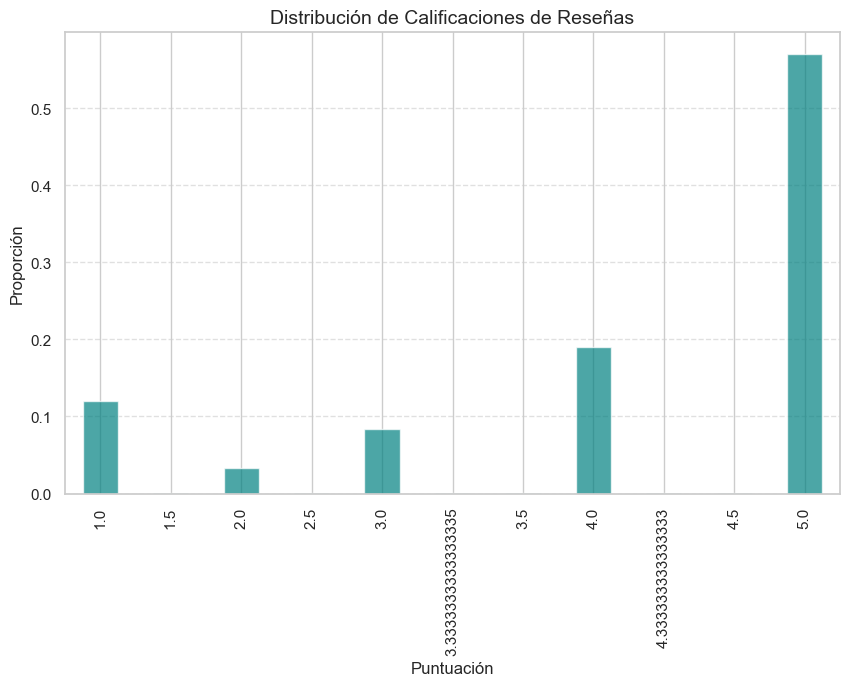

In [19]:
# ======================================================
# 📊 ANÁLISIS EXPLORATORIO: DESCRIPCIÓN GENERAL
# ======================================================

import matplotlib.pyplot as plt

print("🔹 Número de órdenes:", merged['order_id'].nunique())
print("🔹 Número de clientes:", merged['customer_unique_id'].nunique())
print("🔹 Número de vendedores:", merged['seller_id'].nunique())
print("🔹 Categorías de productos:", merged['product_category_name_english'].nunique())
print("🔹 Promedio de valor pagado por pedido:", merged['payment_value'].mean().round(2))
print("🔹 Promedio de calificación (review_score):", merged['review_score'].mean().round(2))
print("🔹 Promedio de días de entrega real:", merged['delivery_time'].mean().round(1))
print("🔹 Promedio de diferencia estimado vs real:", merged['delivery_difference'].mean().round(1))

# Distribución de calificaciones
merged['review_score'].value_counts(normalize=True).sort_index().plot(
    kind='bar', color='teal', alpha=0.7
)
plt.title("Distribución de Calificaciones de Reseñas")
plt.xlabel("Puntuación")
plt.ylabel("Proporción")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


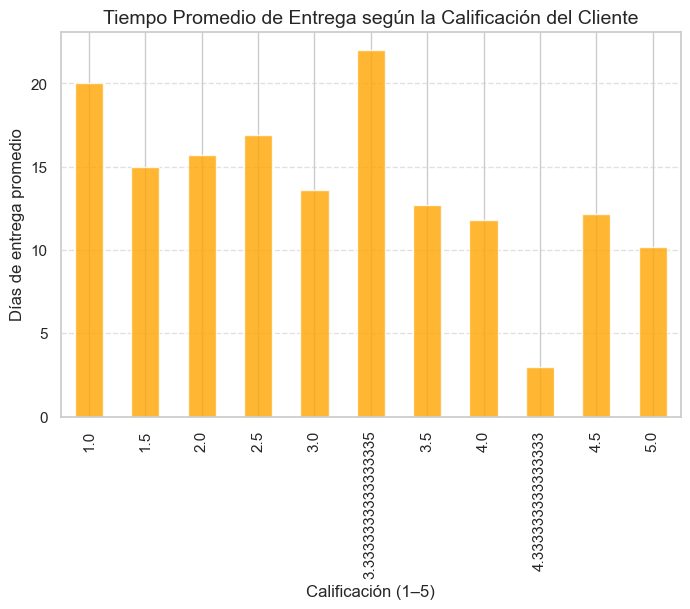

📈 Correlación entre tiempo de entrega y satisfacción: -0.32


In [20]:
# ======================================================
# 🚚 RELACIÓN ENTRE TIEMPO DE ENTREGA Y SATISFACCIÓN
# ======================================================

plt.figure(figsize=(8,5))
merged.groupby('review_score')['delivery_time'].mean().plot(
    kind='bar', color='orange', alpha=0.8
)
plt.title("Tiempo Promedio de Entrega según la Calificación del Cliente")
plt.xlabel("Calificación (1–5)")
plt.ylabel("Días de entrega promedio")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Correlación entre tiempos y satisfacción
corr_delivery_review = merged[['delivery_time', 'review_score']].corr().iloc[0,1]
print(f"📈 Correlación entre tiempo de entrega y satisfacción: {corr_delivery_review:.2f}")


In [22]:
# ======================================================
# 📍 ANÁLISIS GEOGRÁFICO AVANZADO
# ======================================================

# Usar los datasets ya cargados
geolocation = dataframes['geolocation']
customers = dataframes['customers']
sellers = dataframes['sellers']
orders = dataframes['orders']

print("📍 INICIANDO ANÁLISIS GEOGRÁFICO")

# 1. Limpiar y preparar datos geográficos
print("\n1. Limpiando datos geográficos...")

# Normalizar nombres de ciudades (minúsculas, sin espacios extra)
geolocation['geolocation_city_clean'] = geolocation['geolocation_city'].str.lower().str.strip()
customers['customer_city_clean'] = customers['customer_city'].str.lower().str.strip() 
sellers['seller_city_clean'] = sellers['seller_city'].str.lower().str.strip()

# 2. Calcular coordenadas promedio por ciudad/estado
print("2. Calculando coordenadas promedio...")
geo_avg = geolocation.groupby(['geolocation_city_clean', 'geolocation_state']).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_zip_code_prefix': 'first'  # Tomar el primer código postal
}).reset_index()

print(f"   📍 Ciudades únicas procesadas: {len(geo_avg)}")

# 3. Enriquecer clientes con coordenadas
print("3. Enriqueciendo clientes...")
customers_geo = customers.merge(geo_avg,
                                left_on=['customer_city_clean', 'customer_state'],
                                right_on=['geolocation_city_clean', 'geolocation_state'],
                                how='left')

# 4. Enriquecer vendedores con coordenadas  
print("4. Enriqueciendo vendedores...")
sellers_geo = sellers.merge(geo_avg,
                            left_on=['seller_city_clean', 'seller_state'],
                            right_on=['geolocation_city_clean', 'geolocation_state'],
                            how='left')

# 5. Estadísticas del enriquecimiento
print("\n📊 ESTADÍSTICAS DE ENRIQUECIMIENTO GEOGRÁFICO:")
print("="*50)

clientes_con_coords = customers_geo['geolocation_lat'].notna().sum()
vendedores_con_coords = sellers_geo['geolocation_lat'].notna().sum()

print(f"👥 Clientes con coordenadas: {clientes_con_coords:,} de {len(customers_geo):,} ({clientes_con_coords/len(customers_geo)*100:.1f}%)")
print(f"🏪 Vendedores con coordenadas: {vendedores_con_coords:,} de {len(sellers_geo):,} ({vendedores_con_coords/len(sellers_geo)*100:.1f}%)")

# 6. Ciudades principales con coordenadas
print(f"\n🏙️  TOP 10 CIUDADES CON MÁS CLIENTES:")
top_cities = customers_geo.groupby(['customer_city', 'customer_state']).size().reset_index(name='count')
top_cities = top_cities.sort_values('count', ascending=False).head(10)
print(top_cities)

# 7. Guardar resultados
dataframes['customers_geo'] = customers_geo
dataframes['sellers_geo'] = sellers_geo
dataframes['geo_avg'] = geo_avg

print(f"\n🎯 ANÁLISIS GEOGRÁFICO COMPLETADO")
print(f"📁 Datasets enriquecidos guardados en el diccionario 'dataframes'")

📍 INICIANDO ANÁLISIS GEOGRÁFICO

1. Limpiando datos geográficos...
2. Calculando coordenadas promedio...
   📍 Ciudades únicas procesadas: 8462
3. Enriqueciendo clientes...
4. Enriqueciendo vendedores...

📊 ESTADÍSTICAS DE ENRIQUECIMIENTO GEOGRÁFICO:
👥 Clientes con coordenadas: 99,365 de 99,441 (99.9%)
🏪 Vendedores con coordenadas: 2,992 de 3,095 (96.7%)

🏙️  TOP 10 CIUDADES CON MÁS CLIENTES:
              customer_city customer_state  count
3758              sao paulo             SP  15540
3281         rio de janeiro             RJ   6882
469          belo horizonte             MG   2773
587                brasilia             DF   2131
1187               curitiba             PR   1521
739                campinas             SP   1444
3080           porto alegre             RS   1379
3375               salvador             BA   1245
1587              guarulhos             SP   1189
3574  sao bernardo do campo             SP    938

🎯 ANÁLISIS GEOGRÁFICO COMPLETADO
📁 Datasets enriquecid

📊 CREANDO VISUALIZACIONES DE DENSIDAD GEOGRÁFICA
👥 Clientes con coordenadas válidas: 99,365
🏪 Vendedores con coordenadas válidas: 2,992


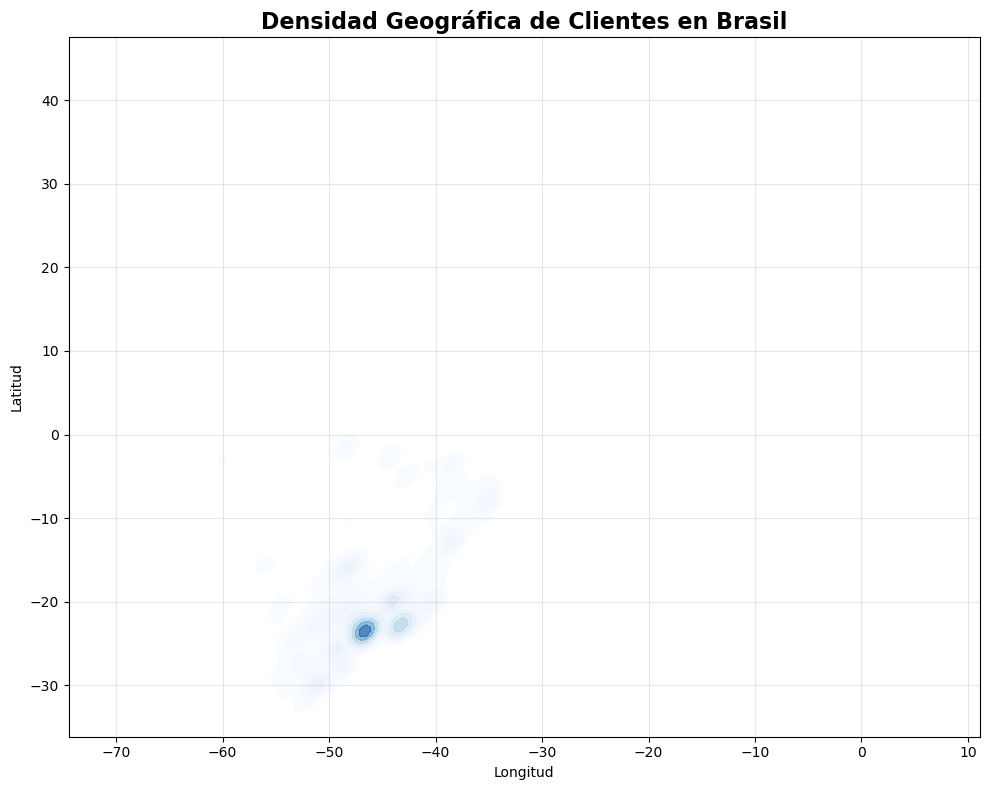

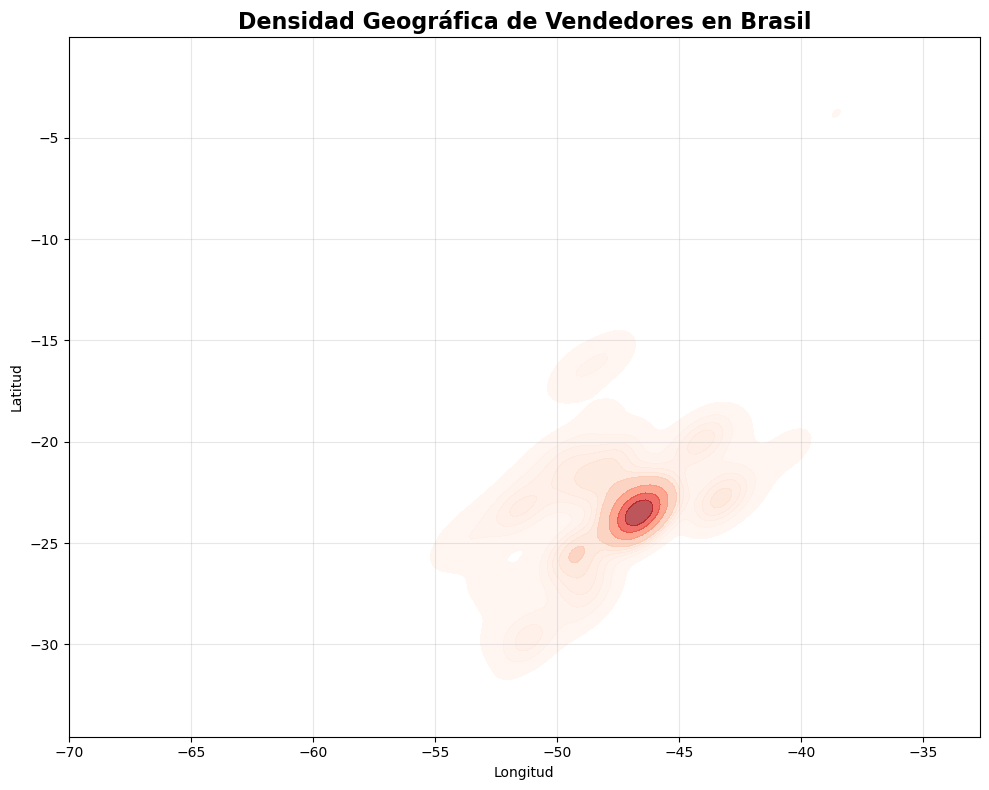

C:\Users\adria\AppData\Local\Temp\ipykernel_12656\1699581205.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


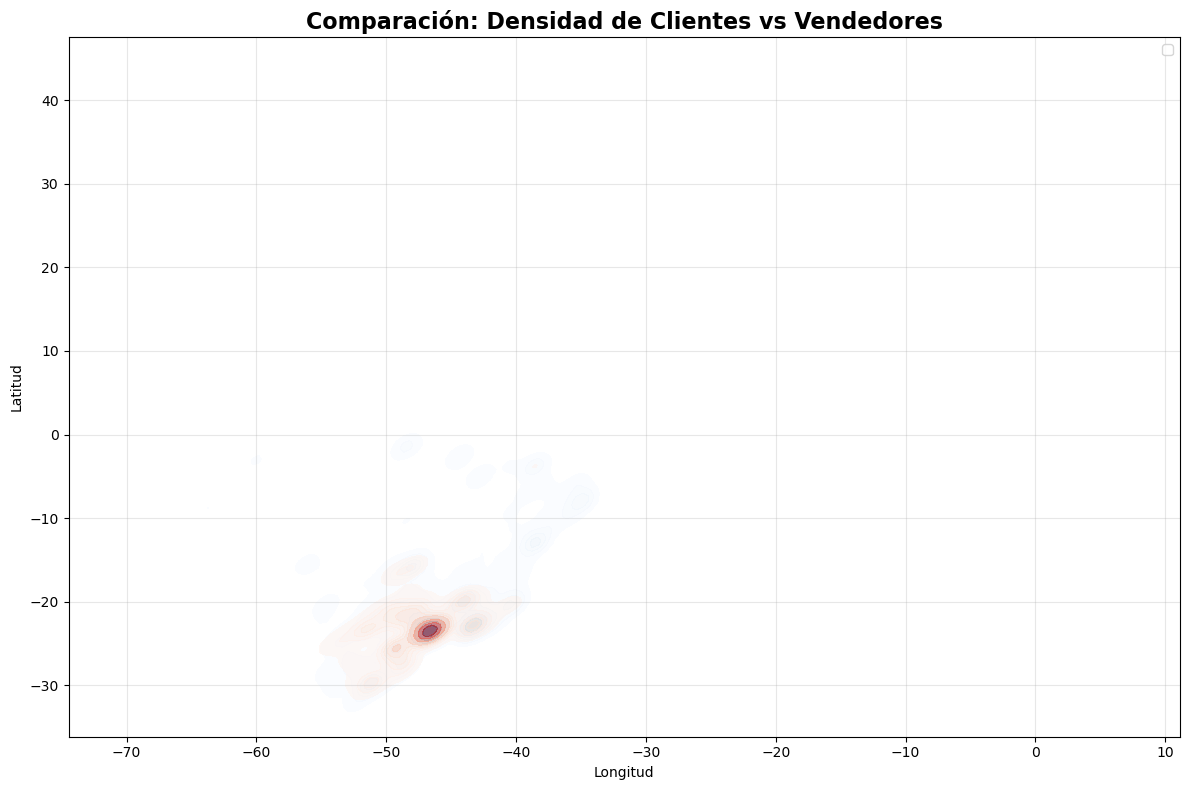

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('default')
sns.set_palette("viridis")

print("📊 CREANDO VISUALIZACIONES DE DENSIDAD GEOGRÁFICA")

# Filtrar solo los datos que tienen coordenadas válidas
customers_with_coords = customers_geo.dropna(subset=['geolocation_lat', 'geolocation_lng'])
sellers_with_coords = sellers_geo.dropna(subset=['geolocation_lat', 'geolocation_lng'])

print(f"👥 Clientes con coordenadas válidas: {len(customers_with_coords):,}")
print(f"🏪 Vendedores con coordenadas válidas: {len(sellers_with_coords):,}")

# 1. Densidad de Clientes
plt.figure(figsize=(10, 8))
sns.kdeplot(x=customers_with_coords['geolocation_lng'], 
            y=customers_with_coords['geolocation_lat'],
            fill=True, cmap='Blues', thresh=0.05, alpha=0.7)
plt.title('Densidad Geográfica de Clientes en Brasil', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Densidad de Vendedores
plt.figure(figsize=(10, 8))
sns.kdeplot(x=sellers_with_coords['geolocation_lng'], 
            y=sellers_with_coords['geolocation_lat'],
            fill=True, cmap='Reds', thresh=0.05, alpha=0.7)
plt.title('Densidad Geográfica de Vendedores en Brasil', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Densidad Comparativa (Clientes vs Vendedores)
plt.figure(figsize=(12, 8))
sns.kdeplot(x=customers_with_coords['geolocation_lng'], 
            y=customers_with_coords['geolocation_lat'],
            fill=True, cmap='Blues', thresh=0.05, alpha=0.5, label='Clientes')
sns.kdeplot(x=sellers_with_coords['geolocation_lng'], 
            y=sellers_with_coords['geolocation_lat'],
            fill=True, cmap='Reds', thresh=0.05, alpha=0.5, label='Vendedores')
plt.title('Comparación: Densidad de Clientes vs Vendedores', fontsize=16, fontweight='bold')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [27]:
import folium
from folium.plugins import MarkerCluster

print("🗺️ CREANDO MAPA INTERACTIVO...")

# Coordenadas centrales de Brasil (ajustadas para mejor visualización)
map_brazil = folium.Map(location=[-15.7801, -47.9292], zoom_start=4, tiles='CartoDB positron')

# Sample más pequeño para mejor rendimiento (usando datos con coordenadas válidas)
customers_sample = customers_with_coords.sample(min(2000, len(customers_with_coords)), random_state=42)
sellers_sample = sellers_with_coords.sample(min(1000, len(sellers_with_coords)), random_state=42)

print(f"📍 Muestreando {len(customers_sample)} clientes y {len(sellers_sample)} vendedores para el mapa")

# Clusters de clientes (azul) - VERSIÓN SIMPLIFICADA SIN icon_create_function
cluster_customers = MarkerCluster(name='Clientes').add_to(map_brazil)

for _, row in customers_sample.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=3,
        popup=f"Cliente: {row['customer_city']}, {row['customer_state']}",
        tooltip=f"Cliente en {row['customer_city']}",
        color='blue',
        fill=True,
        fill_opacity=0.4,
        fill_color='blue'
    ).add_to(cluster_customers)

# Clusters de vendedores (rojo) - VERSIÓN SIMPLIFICADA
cluster_sellers = MarkerCluster(name='Vendedores').add_to(map_brazil)

for _, row in sellers_sample.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=4,
        popup=f"Vendedor: {row['seller_city']}, {row['seller_state']}",
        tooltip=f"Vendedor en {row['seller_city']}",
        color='red',
        fill=True,
        fill_opacity=0.6,
        fill_color='red'
    ).add_to(cluster_sellers)

# Control de capas
folium.LayerControl().add_to(map_brazil)

# Añadir título
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Distribución Geográfica: Clientes vs Vendedores en Brasil</b></h3>
             '''
map_brazil.get_root().html.add_child(folium.Element(title_html))

# Guardar y mostrar
map_brazil.save('mapa_clientes_vendedores.html')
print("✅ Mapa guardado como 'mapa_clientes_vendedores.html'")

# Mostrar el mapa en el notebook
print("🗺️ Mostrando mapa interactivo...")
map_brazil

🗺️ CREANDO MAPA INTERACTIVO...
📍 Muestreando 2000 clientes y 1000 vendedores para el mapa
✅ Mapa guardado como 'mapa_clientes_vendedores.html'
🗺️ Mostrando mapa interactivo...


📈 ANALIZANDO DESEMPEÑO POR ESTADO...
✅ Usando dataset merged existente
📊 Estados analizados: 26


C:\Users\adria\AppData\Local\Temp\ipykernel_12656\3782063360.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_perf.sort_values('review_score_mean', ascending=False),


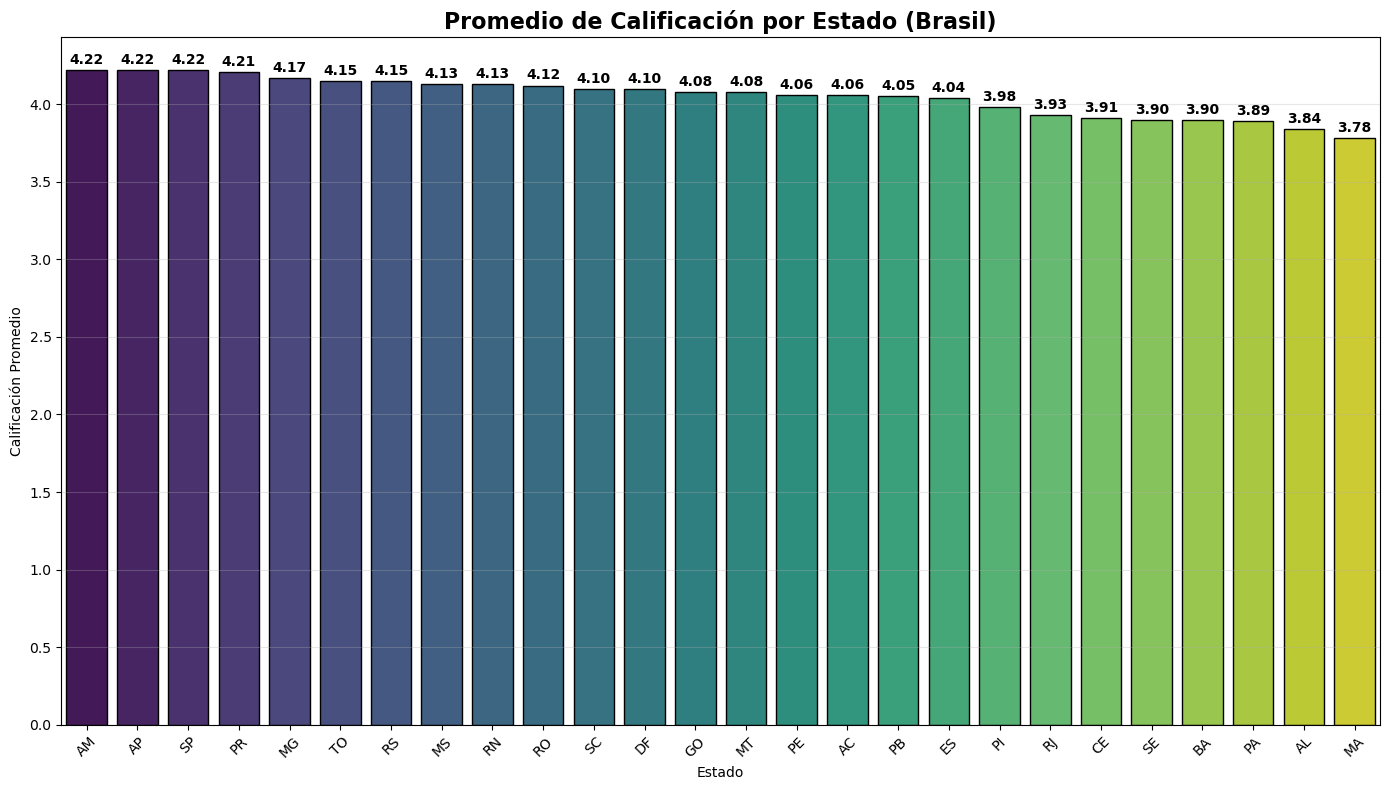

C:\Users\adria\AppData\Local\Temp\ipykernel_12656\3782063360.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_perf.sort_values('avg_delivery_time', ascending=True),


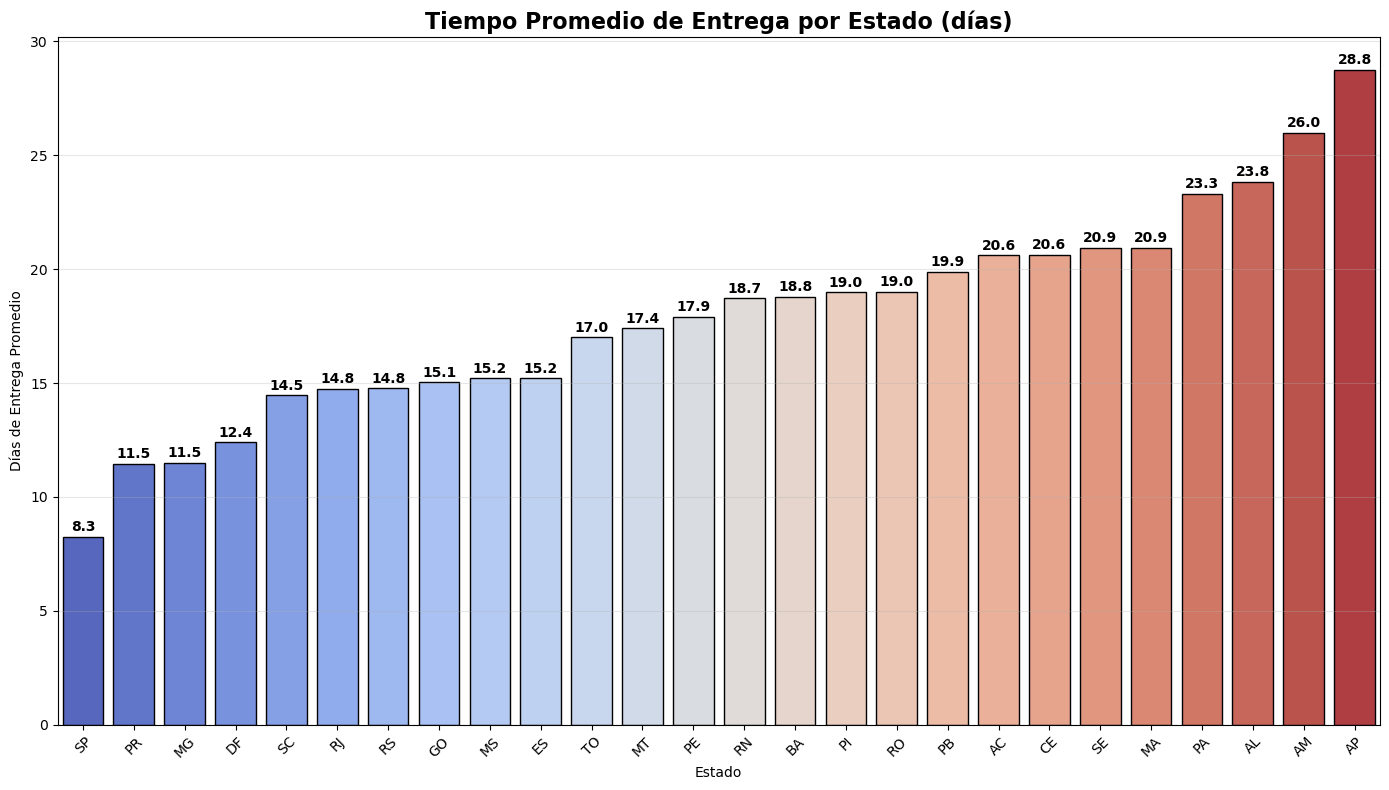

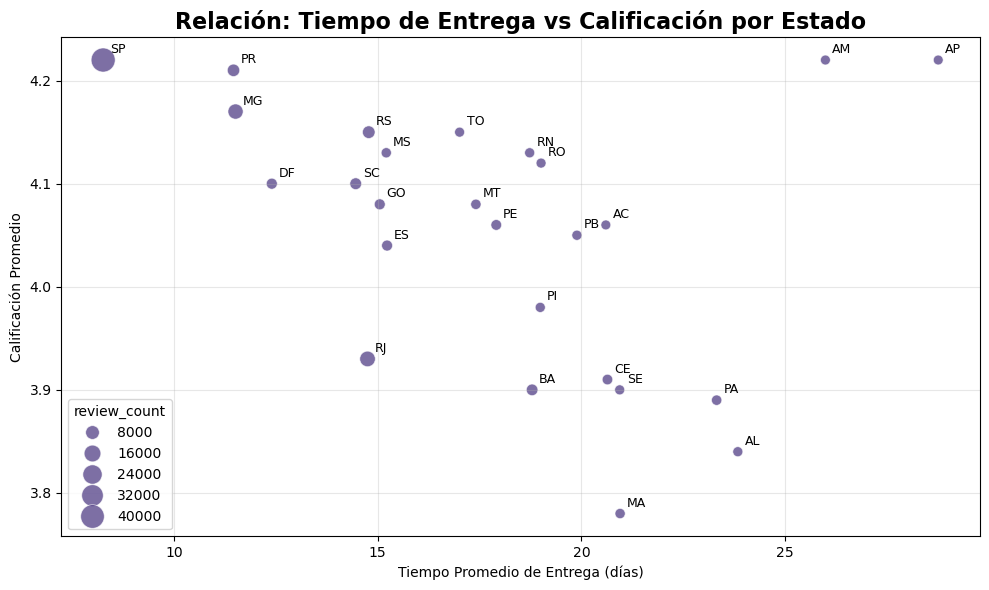


📋 RESUMEN DE DESEMPEÑO POR ESTADO:


customer_state  review_score_mean  review_count  unique_orders  \
2              AM               4.22           148            145   
3              AP               4.22            69             67   
25             SP               4.22         41919          40495   
17             PR               4.21          5058           4923   
10             MG               4.17         11715          11355   
26             TO               4.15           284            274   
22             RS               4.15          5526           5344   
11             MS               4.13           722            701   
19             RN               4.13           488            474   
20             RO               4.12           253            243   

    avg_delivery_time  
2               25.99  
3               28.76  
25               8.26  
17              11.46  
10              11.51  
26              17.01  
22              14.78  
11              15.21  
19              18.73  
20              19.01

In [25]:
print("📈 ANALIZANDO DESEMPEÑO POR ESTADO...")

# Usar el dataset merged que ya creamos anteriormente en lugar de hacer nuevas uniones
if 'merged' in globals():
    print("✅ Usando dataset merged existente")
    geo_analysis = merged.copy()
else:
    print("🔄 Creando unión necesaria para el análisis...")
    # Si no existe 'merged', crear la unión necesaria
    geo_analysis = orders.merge(dataframes['order_reviews'][['order_id', 'review_score']], 
                               on='order_id', how='left').merge(customers, on='customer_id')

# Filtrar solo órdenes entregadas para análisis de desempeño
geo_analysis = geo_analysis[geo_analysis['delivered'] == 1]

# Análisis por estado
geo_perf = geo_analysis.groupby('customer_state').agg({
    'review_score': ['mean', 'count'],
    'order_id': 'nunique',
    'delivery_time': 'mean'
}).round(2)

# Limpiar nombres de columnas
geo_perf.columns = ['review_score_mean', 'review_count', 'unique_orders', 'avg_delivery_time']
geo_perf = geo_perf.reset_index()

# Filtrar estados con suficiente data (más de 50 reviews)
geo_perf = geo_perf[geo_perf['review_count'] > 50]

print(f"📊 Estados analizados: {len(geo_perf)}")

# 1. Gráfico de Calificación por Estado
plt.figure(figsize=(14, 8))
sns.barplot(data=geo_perf.sort_values('review_score_mean', ascending=False),
            x='customer_state', y='review_score_mean', 
            palette='viridis', edgecolor='black')
plt.title('Promedio de Calificación por Estado (Brasil)', fontsize=16, fontweight='bold')
plt.xlabel('Estado')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, v in enumerate(geo_perf.sort_values('review_score_mean', ascending=False)['review_score_mean']):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Gráfico de Tiempo de Entrega por Estado
plt.figure(figsize=(14, 8))
sns.barplot(data=geo_perf.sort_values('avg_delivery_time', ascending=True),
            x='customer_state', y='avg_delivery_time', 
            palette='coolwarm', edgecolor='black')
plt.title('Tiempo Promedio de Entrega por Estado (días)', fontsize=16, fontweight='bold')
plt.xlabel('Estado')
plt.ylabel('Días de Entrega Promedio')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, v in enumerate(geo_perf.sort_values('avg_delivery_time', ascending=True)['avg_delivery_time']):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Relación entre Tiempo de Entrega y Calificación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geo_perf, x='avg_delivery_time', y='review_score_mean', 
                size='review_count', sizes=(50, 300), alpha=0.7)
plt.title('Relación: Tiempo de Entrega vs Calificación por Estado', fontsize=16, fontweight='bold')
plt.xlabel('Tiempo Promedio de Entrega (días)')
plt.ylabel('Calificación Promedio')

# Añadir etiquetas de estados
for i, row in geo_perf.iterrows():
    plt.annotate(row['customer_state'], 
                (row['avg_delivery_time'], row['review_score_mean']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n📋 RESUMEN DE DESEMPEÑO POR ESTADO:")
display(geo_perf.sort_values('review_score_mean', ascending=False).head(10))

🏙️ ANÁLISIS DE CIUDADES PRINCIPALES


C:\Users\adria\AppData\Local\Temp\ipykernel_12656\2156200989.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, y='customer_city', x='total_orders',


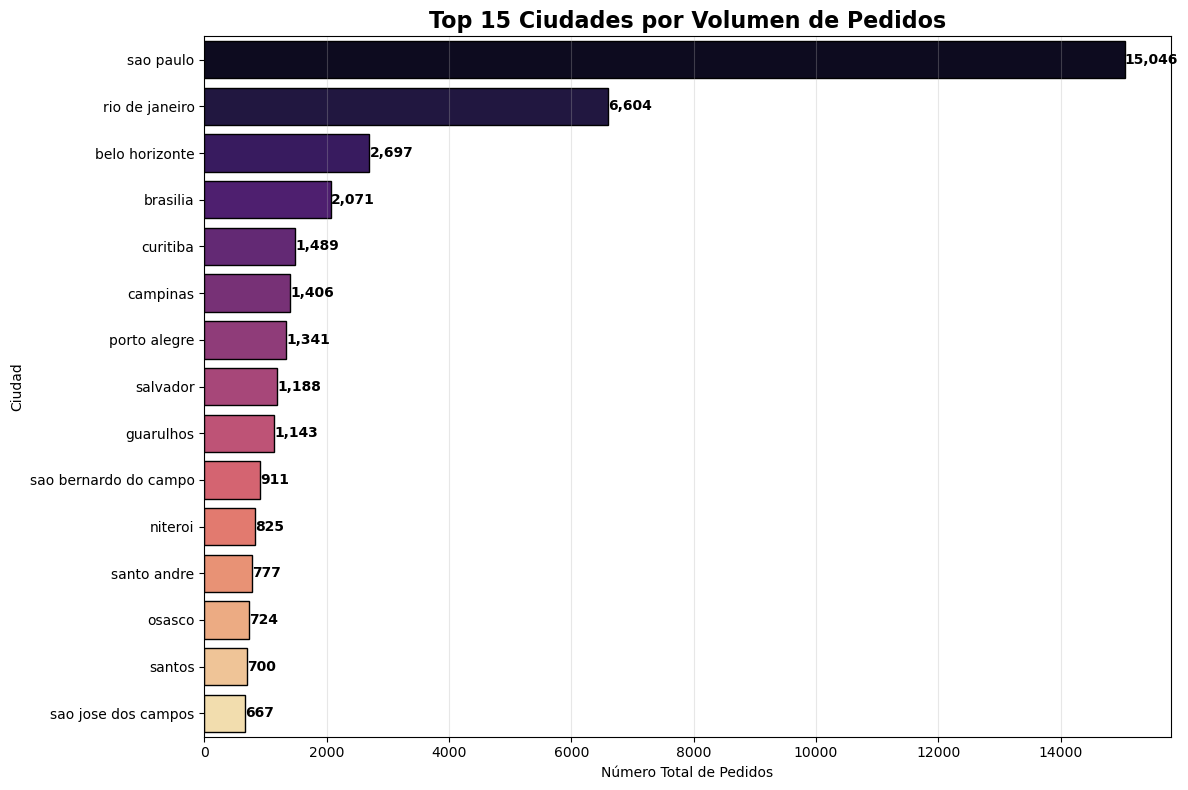

🎉 ANÁLISIS GEOGRÁFICO COMPLETADO


In [26]:
# Análisis adicional: Top ciudades por volumen
print("🏙️ ANÁLISIS DE CIUDADES PRINCIPALES")

city_analysis = geo_analysis.groupby(['customer_city', 'customer_state']).agg({
    'review_score': 'mean',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).rename(columns={
    'order_id': 'total_orders',
    'customer_id': 'unique_customers'
}).reset_index()

# Top 15 ciudades por número de pedidos
top_cities = city_analysis.nlargest(15, 'total_orders')

plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, y='customer_city', x='total_orders', 
            palette='magma', edgecolor='black')
plt.title('Top 15 Ciudades por Volumen de Pedidos', fontsize=16, fontweight='bold')
plt.xlabel('Número Total de Pedidos')
plt.ylabel('Ciudad')
plt.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, v in enumerate(top_cities['total_orders']):
    plt.text(v + 5, i, f'{v:,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎉 ANÁLISIS GEOGRÁFICO COMPLETADO")

In [28]:
import os
from pathlib import Path

# Verificar que el archivo se creó correctamente
html_file = Path('mapa_clientes_vendedores.html')
if html_file.exists():
    print(f"✅ Archivo HTML creado: {html_file.absolute()}")
    print(f"📏 Tamaño: {html_file.stat().st_size} bytes")
    
    # Abrir el archivo en el navegador por defecto
    import webbrowser
    webbrowser.open(f'file://{html_file.absolute()}')
else:
    print("❌ El archivo HTML no se creó")

✅ Archivo HTML creado: D:\Portafolio\Proyecto_e-commerce\data\olist_dataset\mapa_clientes_vendedores.html
📏 Tamaño: 3895403 bytes
